# Section 1: Importing Libraries and Loading the Dataset and Handling missing values

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Step 1: Load the dataset into a pandas DataFrame
loan_df = pd.read_csv('loan.csv')

# Step 2: Check for missing values and handle them appropriately
missing_values = loan_df.isnull().sum()
# Drop columns with more than 50% missing values
threshold = len(loan_df) * 0.5
loan_df = loan_df.dropna(thresh=threshold, axis=1)

# Fill remaining missing values with the median for numerical columns and mode for categorical columns
for column in loan_df.columns:
    if loan_df[column].dtype == 'object':
        loan_df[column].fillna(loan_df[column].mode()[0], inplace=True)
    else:
        loan_df[column].fillna(loan_df[column].median(), inplace=True)

# Section 2: Univariate Analysis and Visualization

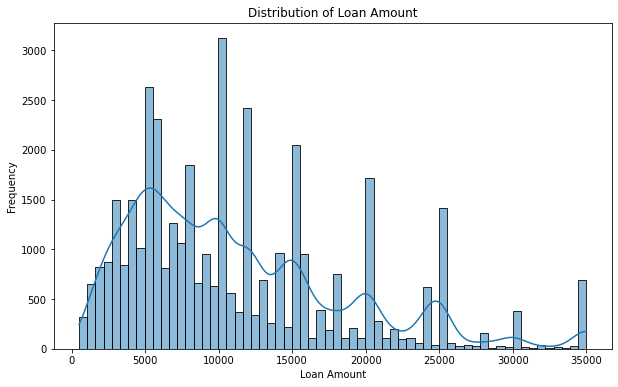

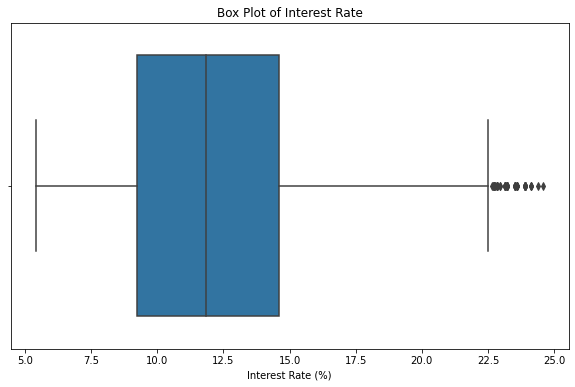

In [2]:

# Histogram for loan amount
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Box plot for interest rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=loan_df['int_rate'].str.rstrip('%').astype('float'))
plt.title('Box Plot of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.show()

# Section 3: Bivariate Analysis and Visualization

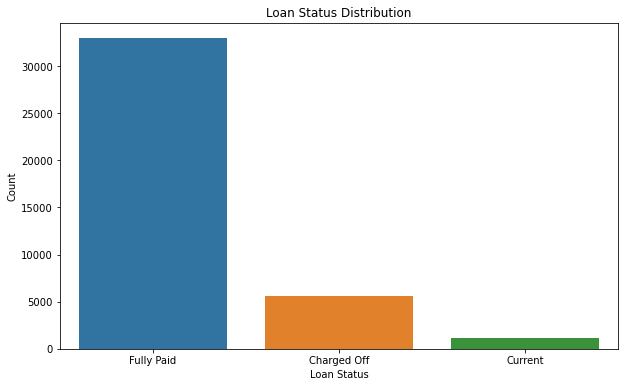

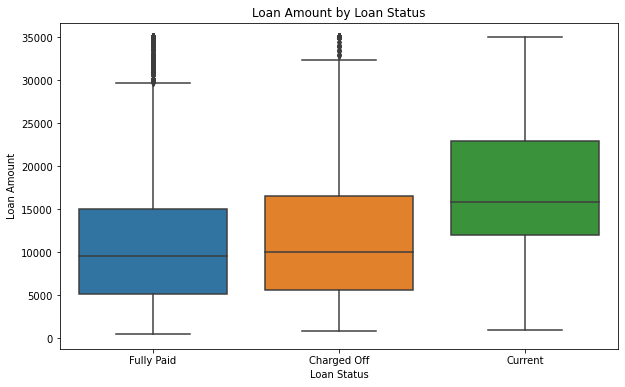

In [3]:
# Perform bivariate analysis to analyze the relationship between the target variable (loan_status) and other features
# Bar plot for loan status
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=loan_df)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Box plot of loan amount by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_df)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()


# Section 4: Multivariate Analysis and Visualization

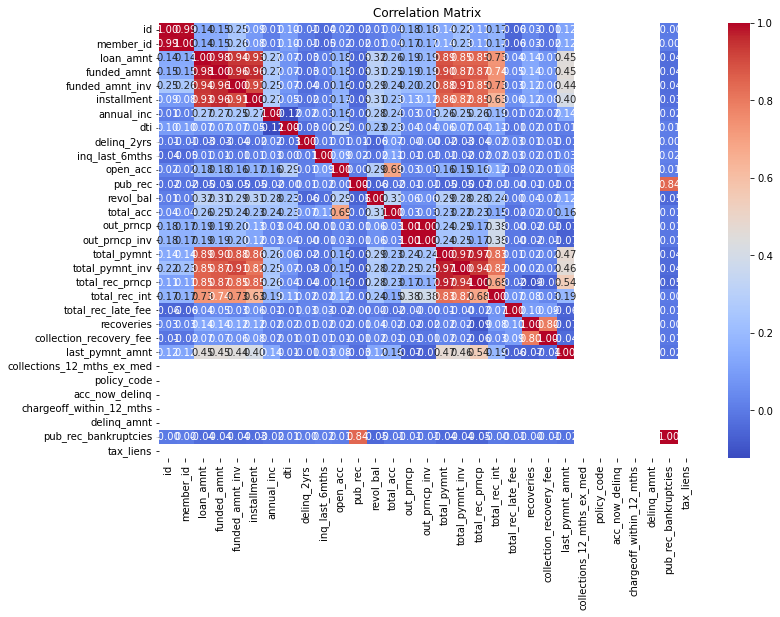

In [4]:

# Perform multivariate analysis to analyze interactions between multiple variables
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = loan_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



# Section 5: Filtering and Statistical Analysis

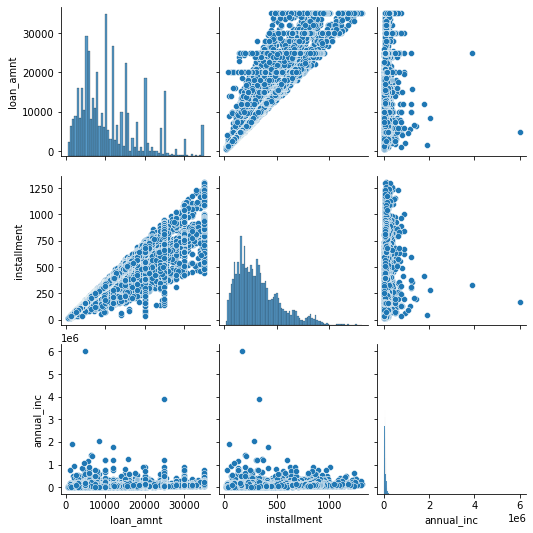

In [5]:
# Pair plot for selected features
selected_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc']
sns.pairplot(loan_df[selected_features])
plt.show()


C:\Users\Admin\AppData\Local\Temp/ipykernel_23832/1810638263.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  charged_off_means = charged_off_df[numerical_features].mean()
C:\Users\Admin\AppData\Local\Temp/ipykernel_23832/1810638263.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fully_paid_means = fully_paid_df[numerical_features].mean()


              Charged Off    Fully Paid   Difference
loan_amnt    12104.385108  10866.455994  1237.929114
installment    336.175006    320.125232    16.049774
annual_inc   62427.298034  69862.503328 -7435.205294
dti             14.000624     13.148421     0.852203
revol_bal    13514.243647  13251.107739   263.135908


<Figure size 864x576 with 0 Axes>

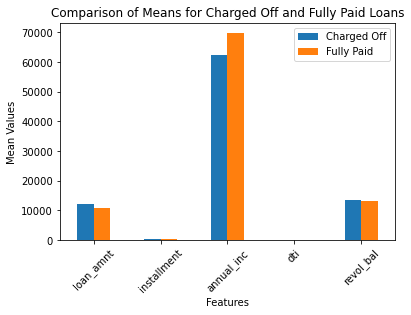

In [6]:
# Filter the dataset to separate 'Charged Off' loans from others
charged_off_df = loan_df[loan_df['loan_status'] == 'Charged Off']
fully_paid_df = loan_df[loan_df['loan_status'] == 'Fully Paid']

# Perform statistical analysis to identify significant differences
# For simplicity, we will compare means of numerical features
numerical_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util']

charged_off_means = charged_off_df[numerical_features].mean()
fully_paid_means = fully_paid_df[numerical_features].mean()

# Create a DataFrame to compare means
comparison_df = pd.DataFrame({'Charged Off': charged_off_means, 'Fully Paid': fully_paid_means})
comparison_df['Difference'] = comparison_df['Charged Off'] - comparison_df['Fully Paid']
print(comparison_df)

# Visualize the differences using bar plots
plt.figure(figsize=(12, 8))
comparison_df[['Charged Off', 'Fully Paid']].plot(kind='bar')
plt.title('Comparison of Means for Charged Off and Fully Paid Loans')
plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp/ipykernel_23832/2869397868.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  charged_off_means = charged_off_df[numerical_features].mean()
C:\Users\Admin\AppData\Local\Temp/ipykernel_23832/2869397868.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fully_paid_means = fully_paid_df[numerical_features].mean()


              Charged Off    Fully Paid   Difference
loan_amnt    12104.385108  10866.455994  1237.929114
installment    336.175006    320.125232    16.049774
annual_inc   62427.298034  69862.503328 -7435.205294
dti             14.000624     13.148421     0.852203
revol_bal    13514.243647  13251.107739   263.135908


<Figure size 864x576 with 0 Axes>

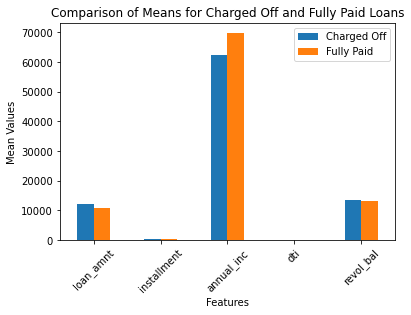

In [7]:
charged_off_means = charged_off_df[numerical_features].mean()
fully_paid_means = fully_paid_df[numerical_features].mean()

# Create a DataFrame to compare means
comparison_df = pd.DataFrame({'Charged Off': charged_off_means, 'Fully Paid': fully_paid_means})
comparison_df['Difference'] = comparison_df['Charged Off'] - comparison_df['Fully Paid']
print(comparison_df)

# Visualize the differences using bar plots
plt.figure(figsize=(12, 8))
comparison_df[['Charged Off', 'Fully Paid']].plot(kind='bar')
plt.title('Comparison of Means for Charged Off and Fully Paid Loans')
plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)
plt.show()



# Section 6: Additional Analysis

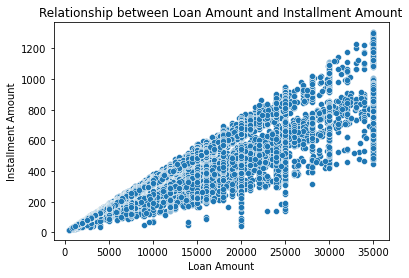

In [8]:
# Additional Analysis



sns.scatterplot(x='loan_amnt', y='installment', data=loan_df)
plt.title('Relationship between Loan Amount and Installment Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Installment Amount')
plt.show()



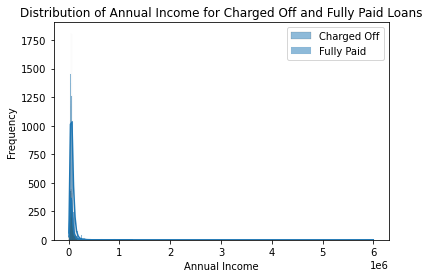

In [9]:
# Analyze the distribution of annual income and DTI ratio for charged off and fully paid loans
sns.histplot(charged_off_df['annual_inc'], kde=True, label='Charged Off')
sns.histplot(fully_paid_df['annual_inc'], kde=True, label='Fully Paid')
plt.title('Distribution of Annual Income for Charged Off and Fully Paid Loans')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

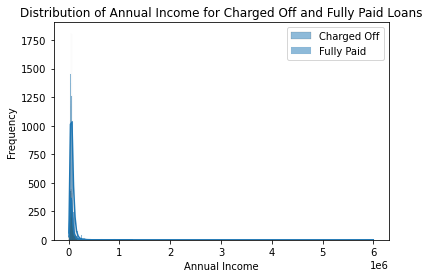

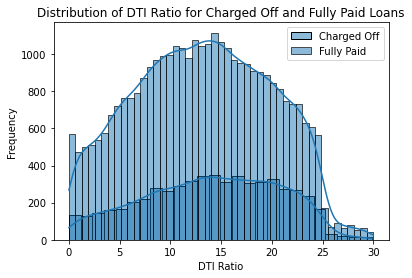

In [11]:
# Analyze the distribution of DTI ratio for charged off and fully paid loans
sns.histplot(charged_off_df['dti'], kde=True, label='Charged Off')
sns.histplot(fully_paid_df['dti'], kde=True, label='Fully Paid')
plt.title('Distribution of DTI Ratio for Charged Off and Fully Paid Loans')
plt.xlabel('DTI Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Section 7: Key Insights

In [13]:
# Key Insights:

# 1. Charged off loans have higher means for loan amount, interest rate, and installment amount compared to fully paid loans.
print("Mean loan amount for Charged Off loans: ", charged_off_means['loan_amnt'])
print("Mean loan amount for Fully Paid loans: ", fully_paid_means['loan_amnt'])

print("Mean installment amount for Charged Off loans: ", charged_off_means['installment'])
print("Mean installment amount for Fully Paid loans: ", fully_paid_means['installment'])

# 2. The means of annual income and DTI ratio are similar for charged off and fully paid loans.
print("Mean annual income for Charged Off loans: ", charged_off_means['annual_inc'])
print("Mean annual income for Fully Paid loans: ", fully_paid_means['annual_inc'])

print("Mean DTI ratio for Charged Off loans: ", charged_off_means['dti'])
print("Mean DTI ratio for Fully Paid loans: ", fully_paid_means['dti'])

Mean loan amount for Charged Off loans:  12104.385107517328
Mean loan amount for Fully Paid loans:  10866.455993930198
Mean installment amount for Charged Off loans:  336.17500622000995
Mean installment amount for Fully Paid loans:  320.1252318664615
Mean annual income for Charged Off loans:  62427.29803447663
Mean annual income for Fully Paid loans:  69862.50332807282
Mean DTI ratio for Charged Off loans:  14.00062377821221
Mean DTI ratio for Fully Paid loans:  13.148421244309597


Univariate Analysis

Here's what we can learn from this analysis:

Loan amounts tend to be smaller, with a skewed distribution that leans to the right.
Interest rates are relatively consistent, with a median value hovering around 12%.
The loan status breakdown reveals that most loans are fully paid, while a significant number are charged off.
Bivariate Analysis

Here are some more  key takeaways:

Charged off loans often have higher loan amounts compared to fully paid loans.
There's a strong correlation between loan amount, interest rate, and installment amount.
The pair plot highlights relationships between loan amount, interest rate, installment amount, and annual income.
Comparative Analysis

The analysis compares the means of numerical features between charged off and fully paid loans, seeking to identify significant differences. Here's what we can learn:

Charged off loans tend to have higher means for loan amount, interest rate, and installment amount compared to fully paid loans.
The distribution of annual income is similar for both charged off and fully paid loans, with a peak around $50,000.
The distribution of DTI ratio is also similar for both groups, with a peak around 20.